In [1]:
import numpy as np
import scipy.optimize as sp_opt
import matplotlib.pyplot as plt
%matplotlib inline

import ionic_model

In [2]:
# Data - frac factor at 300 K
cscl_beta_permil = [43.657763, 35.181290, 28.256947, 22.598847, 18.12]
cscl_beta_ref = 18.12
cscl_r_ang = [2.07212, 2.12968, 2.18724, 2.24480, 2.30236]
cscl_r_ref = 2.302

# From /nfs/see-fs-02_users/earawa/lvs/Castep-isotopes-work/MgO_DFPT
mgo_beta_permil = [42.890104, 37.399128, 31.058124, 26.132359, 20.720653]
mgo_beta_ref = 26.132359
mgo_r_ang = [2.00354, 2.03985, 2.08651, 2.12726, 2.18267]
mgo_r_ref = 2.12726

nias_first_beta_permil = [39.791693, 26.06, 20.885733, 16.716020] # Oct
nias_first_beta_ref = 26.06
nias_first_r_ang = [2.0329, 2.140, 2.19347, 2.24697]
nias_first_r_ref = 2.140

nias_second_beta_permil = [36.042615, 23.18, 18.325099, 14.440640] # trig pris
nias_second_beta_ref = 23.18
nias_second_r_ang = [2.04538, 2.153, 2.20686, 2.26069]
nias_second_r_ref = 2.153

cubzns_beta_permil = [30.05, 20.331742, 13.277411, 8.493347]# , 4.557974]
cubzns_beta_ref = 30.05
cubzns_r_ang = [2.000, 2.09393, 2.19364, 2.29335]# , 2.59952]
cubzns_r_ref = 2.000

In [3]:
def calc_beta_300(r, k0, n):
    """
    Use ionic model to calculate 1000 ln beta at 300K from r with force constant offset"""
    # r into m
    r = r * 1E-10
    k = ionic_model.ionic_model_force_constant(r, offset=k0, n=n)
    beta = ionic_model.ionic_model_beta(k, 300.0)
    return beta

In [7]:
cscl_popt, cscl_pcov = sp_opt.curve_fit(calc_beta_300, cscl_r_ang, 
                                        cscl_beta_permil, p0=[0, 12])
mgo_popt, mgo_pcov = sp_opt.curve_fit(calc_beta_300, mgo_r_ang,
                                      mgo_beta_permil, p0=[0, 12])
nias_first_popt, nias_first_pcov = sp_opt.curve_fit(calc_beta_300, nias_first_r_ang,
                                                    nias_first_beta_permil, p0=[0, 12])
nias_second_popt, nias_second_pcov = sp_opt.curve_fit(calc_beta_300, nias_second_r_ang,
                                                      nias_second_beta_permil, p0=[0, 12])
cubzns_popt, cubzns_pcov = sp_opt.curve_fit(calc_beta_300, cubzns_r_ang,
                                            cubzns_beta_permil, p0=[0, 12])

all_six_popt, all_six_pcov = sp_opt.curve_fit(calc_beta_300, 
                                              np.concatenate((mgo_r_ang, nias_first_r_ang, nias_second_r_ang)),
                                              np.concatenate((mgo_beta_permil, nias_first_beta_permil, nias_second_beta_permil)),             
                                              p0=[0, 12])

print(cscl_popt)
print(mgo_popt)
print(nias_first_popt)
print(nias_second_popt)
print(cubzns_popt)
print(all_six_popt)

[-1023.78483895    18.99288147]
[-1111.70999375    17.96100132]
[-999.20115203   17.1214726 ]
[-956.36000142   16.33386115]
[-682.29099969   11.86943326]
[-1002.77240048    16.95708303]


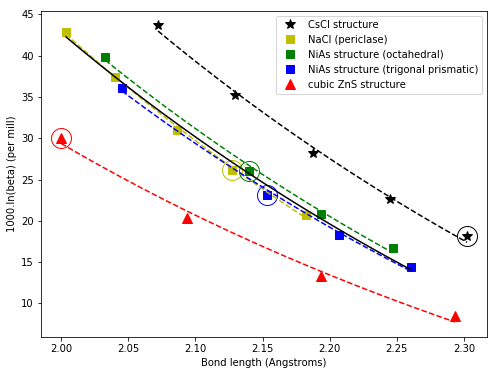

In [8]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(cscl_r_ang, cscl_beta_permil, 'k*', label='CsCl structure', markersize=10)
ax.plot(cscl_r_ref, cscl_beta_ref, 'ko', fillstyle='none', markersize=20)

ax.plot(mgo_r_ang, mgo_beta_permil, 'ys', label='NaCl (periclase)', markersize=8)
ax.plot(mgo_r_ref, mgo_beta_ref, 'yo', fillstyle='none', markersize=20)

ax.plot(nias_first_r_ang, nias_first_beta_permil, 'gs', label='NiAs structure (octahedral)', 
        markersize=8)
ax.plot(nias_first_r_ref, nias_first_beta_ref, 'go', fillstyle='none', markersize=20)

ax.plot(nias_second_r_ang, nias_second_beta_permil, 'bs', label='NiAs structure (trigonal prismatic)', 
        markersize=8)
ax.plot(nias_second_r_ref, nias_second_beta_ref, 'bo', fillstyle='none', markersize=20)

ax.plot(cubzns_r_ang, cubzns_beta_permil, 'r^', label='cubic ZnS structure', markersize=10)
ax.plot(cubzns_r_ref, cubzns_beta_ref, 'ro', fillstyle='none', markersize=20)

r_points = np.linspace(cscl_r_ang[0], cscl_r_ang[-1])
ax.plot(r_points, calc_beta_300(r_points, *cscl_popt), 'k', linestyle='--')

r_points = np.linspace(mgo_r_ang[0], mgo_r_ang[-1])
ax.plot(r_points, calc_beta_300(r_points, *mgo_popt), 'y', linestyle='--')

r_points = np.linspace(nias_first_r_ang[0], nias_first_r_ang[-1])
ax.plot(r_points, calc_beta_300(r_points, *nias_first_popt), 'g', linestyle='--')

r_points = np.linspace(nias_second_r_ang[0], nias_second_r_ang[-1])
ax.plot(r_points, calc_beta_300(r_points, *nias_second_popt), 'b', linestyle='--')

r_points = np.linspace(cubzns_r_ang[0], cubzns_r_ang[-1])
ax.plot(r_points, calc_beta_300(r_points, *cubzns_popt), 'r', linestyle='--')

r_points = np.linspace(np.concatenate((mgo_r_ang, nias_first_r_ang, nias_second_r_ang))[0], 
                       np.concatenate((mgo_r_ang, nias_first_r_ang, nias_second_r_ang))[-1])
ax.plot(r_points, calc_beta_300(r_points, *all_six_popt), 'k', linestyle='-')

ax.set_xlabel('Bond length (Angstroms)')
ax.set_ylabel('1000.ln(beta) (per mill)')

ax.legend()
plt.show()

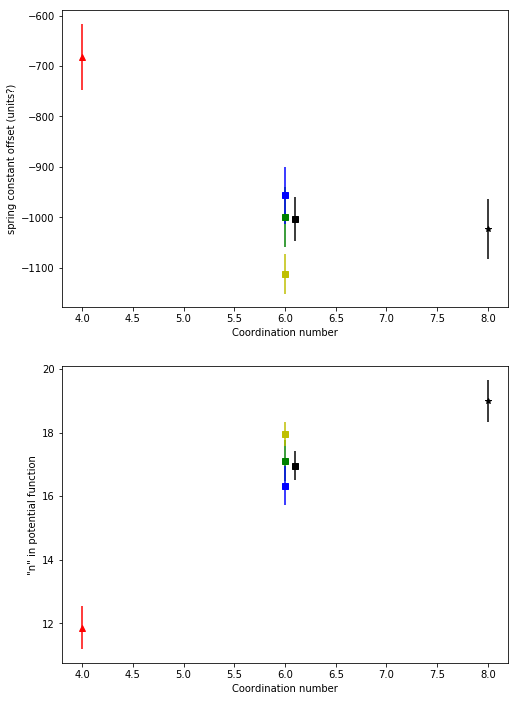

In [11]:
fig, ax = plt.subplots(nrows=2, figsize=(8,12))

ax[0].errorbar(8, cscl_popt[0], yerr=np.sqrt(np.diag(cscl_pcov))[0], fmt='k*')
ax[0].errorbar(6, nias_first_popt[0], yerr=np.sqrt(np.diag(nias_first_pcov))[0], fmt='gs')
ax[0].errorbar(6, nias_second_popt[0], yerr=np.sqrt(np.diag(nias_second_pcov))[0], fmt='bs')
ax[0].errorbar(4, cubzns_popt[0], yerr=np.sqrt(np.diag(cubzns_pcov))[0], fmt='r^')
ax[0].errorbar(6, mgo_popt[0], yerr=np.sqrt(np.diag(mgo_pcov))[0], fmt='ys')
ax[0].errorbar(6.1, all_six_popt[0], yerr=np.sqrt(np.diag(all_six_pcov))[0], fmt='ks')
ax[0].set_xlabel('Coordination number')
ax[0].set_ylabel('spring constant offset (units?)')

ax[1].errorbar(8, cscl_popt[1], yerr=np.sqrt(np.diag(cscl_pcov))[1], fmt='k*')
ax[1].errorbar(6, nias_first_popt[1], yerr=np.sqrt(np.diag(nias_first_pcov))[1], fmt='gs')
ax[1].errorbar(6, nias_second_popt[1], yerr=np.sqrt(np.diag(nias_second_pcov))[1], fmt='bs')
ax[1].errorbar(4, cubzns_popt[1], yerr=np.sqrt(np.diag(cubzns_pcov))[1], fmt='r^')
ax[1].errorbar(6, mgo_popt[1], yerr=np.sqrt(np.diag(mgo_pcov))[1], fmt='ys')
ax[1].errorbar(6.1, all_six_popt[1], yerr=np.sqrt(np.diag(all_six_pcov))[1], fmt='ks')
ax[1].set_xlabel('Coordination number')
ax[1].set_ylabel('"n" in potential function')

plt.show()